# MNIST 손글씨 분류 - 신경망

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

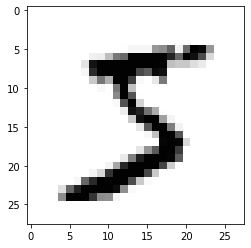

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys');

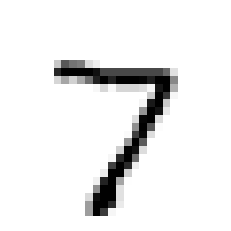

In [13]:
plt.imshow(X_test[0], cmap='Greys'); plt.axis('off');

In [17]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [20]:
type(X_train), X_train.dtype        # uint8: unsigned int (8bit): 0 ~ 255

(numpy.ndarray, dtype('uint8'))

In [21]:
# 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255.
X_test = X_test / 255.

In [22]:
# 이미지 차원 변경: 2차원 --> 1차원
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [24]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/실행/평가

In [25]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
model = Sequential([ 
    Dense(512, input_dim=784, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 48)                24624     
                                                                 
 dense_2 (Dense)             (None, 10)                490       
                                                                 
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_path = 'mnist_dnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [29]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=200, verbose=0,
                 callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.15756, saving model to mnist_dnn.h5

Epoch 00002: val_loss improved from 0.15756 to 0.11145, saving model to mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11145 to 0.09489, saving model to mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09489 to 0.08462, saving model to mnist_dnn.h5

Epoch 00005: val_loss did not improve from 0.08462

Epoch 00006: val_loss improved from 0.08462 to 0.08093, saving model to mnist_dnn.h5

Epoch 00007: val_loss improved from 0.08093 to 0.07590, saving model to mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.07590

Epoch 00009: val_loss did not improve from 0.07590

Epoch 00010: val_loss did not improve from 0.07590

Epoch 00011: val_loss did not improve from 0.07590

Epoch 00012: val_loss did not improve from 0.07590

Epoch 00013: val_loss did not improve from 0.07590

Epoch 00014: val_loss did not improve from 0.07590

Epoch 00015: val_loss did not improve from 0.07590

Epoch 00016: val_lo

In [30]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9810


[0.06470876187086105, 0.9810000061988831]

- 학습과정 시각화

In [31]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

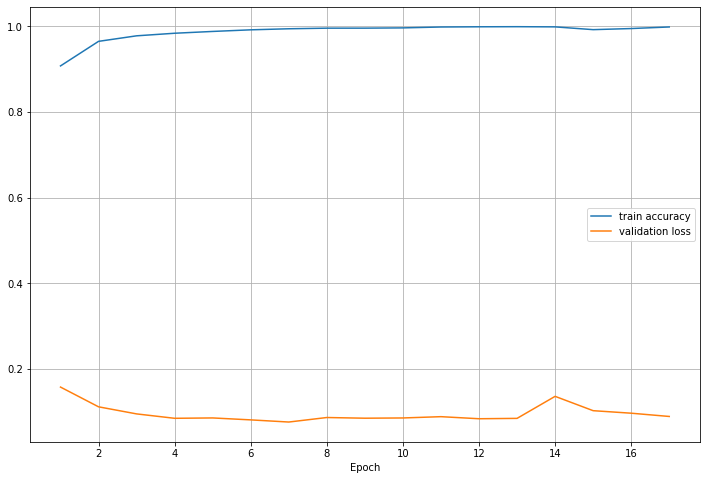

In [33]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()